2. Evaluate an big data algorithm tutorial

# Evaluating Random Forest Regression Model

Random forests is a supervised learning algorithm. It can be used both for classification and regression.

How does the algorithm work?
It works in four steps:

1. Select random samples from a given dataset.
2. Construct a decision tree for each sample and get a prediction result from each decision tree.
3. Perform a vote for each predicted result.
4. Select the prediction result with the most votes as the final prediction.

<img src="randomforest.webp">

### Data Setup
* Import scikit-learn dataset library
* Load dataset

The data we're using for this tuturial is the iris dataset from sklearn.

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
# print the label species(setosa, versicolor,virginica)
print(iris.target_names)
# print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [17]:
# print the iris data (top 5 records)
print(iris.data[0:5])
# print the iris labels (0:setosa, 1:versicolor, 2:virginica)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Let us now create a dataframe with some selected columns from the iris data set.

In [5]:
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,petal length,petal width,sepal length,sepal width,species
0,1.4,0.2,5.1,3.5,0
1,1.4,0.2,4.9,3.0,0
2,1.3,0.2,4.7,3.2,0
3,1.5,0.2,4.6,3.1,0
4,1.4,0.2,5.0,3.6,0


Now we need to split the dataset into train and test sets using the train_test_split function from sklearn.model_selection.

In [18]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

Implementing the RandromForestClassifier and training it on the training data and using it to predict on test data.

In [19]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

Let us now check the accuracy of the model.

In [22]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.9333333333333333)


Let us make a prediction for a single item with the following feature values.

sepal length = 3
sepal width = 5
petal length = 4
petal width = 2

In [11]:
clf.predict([[3, 5, 4, 2]])

array([2])

The item belongs to class [2] which is Flower Type Virginica.

Let us now check which features have more importance.

In [25]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.440430
petal width (cm)     0.432965
sepal length (cm)    0.097045
sepal width (cm)     0.029561
dtype: float64

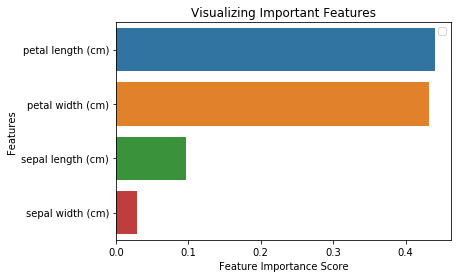

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Let us now remove the feature sepal width from the datasets.

In [27]:
# Import train_test_split function
from sklearn.cross_validation import train_test_split
# Split dataset into features and labels
X=data[['petal length', 'petal width','sepal length']]  # Removed feature "sepal length"
y=data['species']                                      
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test

In [28]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.9523809523809523)


As we can see that the accuracy has increased from 0.93 to 0.95. Let's also calculate the Mean Absolute Error of the model.

In [32]:
import numpy as np
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

('Mean Absolute Error:', 0.05)


#### Evaluation

From our implementation, we can see that Random Forest's prediction depends on which features have been selected. Random Forest Model does a better job of classifying and making predictions for a dataset with "important features". If there are more features that do not have much importance, it disturbs the classification/prediction. 